In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [31]:
def create_data():
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img, cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img_array, (128, 128))
            training_data.append([img_resized, category_index])
    return training_data

In [32]:
training_data = create_data()

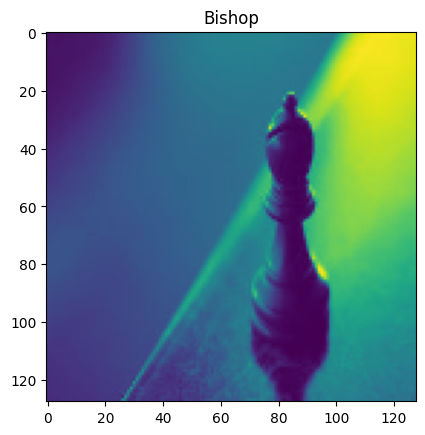

In [33]:
index_test = 48
plt.imshow(training_data[index_test][0])
plt.title(CATEGORIES[training_data[index_test][1]])
plt.show()

In [34]:
import random

# to mix the data
random.shuffle(training_data)

In [35]:
X = [] # the X_training
Y = [] # the Y_training

In [36]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [37]:
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(651, 128, 128, 1)
(651,)


In [38]:
import tensorflow as tf
X = tf.keras.utils.normalize(X, axis = 1)

In [39]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [40]:
print(X.shape[1:])

(128, 128, 1)


In [41]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64 , (3,3), activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - accuracy: 0.1931 - loss: 1.6141
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.2643 - loss: 1.5928
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.2978 - loss: 1.5787
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 333ms/step - accuracy: 0.4109 - loss: 1.4342
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.4498 - loss: 1.3307
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.5639 - loss: 1.1230
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.6497 - loss: 1.0312
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.6586 - loss: 0.8687
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.7652 - loss: 0.7051
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.7607 - loss: 0.6034
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step - accuracy: 0.8450 - loss: 0.4683
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step

In [47]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4869 - loss: 2.3336
0.4580152630805969


In [48]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


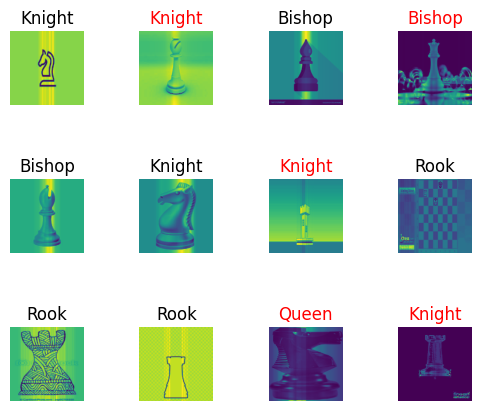

In [53]:
x = 0
y = x+12
# printing some pictures of the x_test and it's predictions as title
false_values = 0
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'black'
    if np.argmax(predictions[i]) != Y_test[i]:
        false_values = false_values + 1
        color = 'red'
    plt.title(CATEGORIES[np.argmax(predictions[i])], color=color)
plt.show()